In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')
#Cek Data
print('Data Shape : ', df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

Data Shape :  (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100

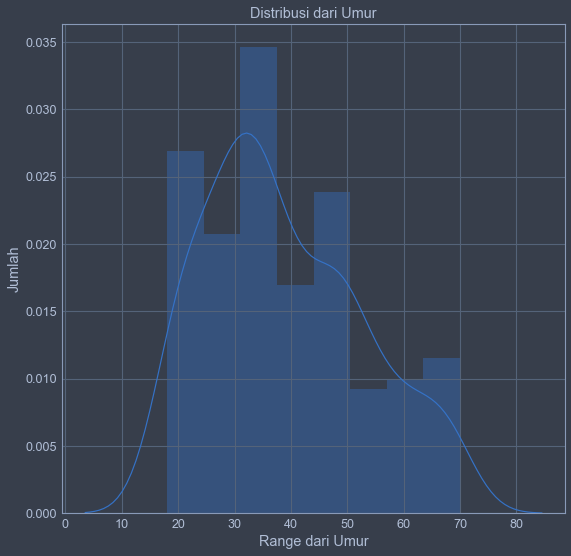

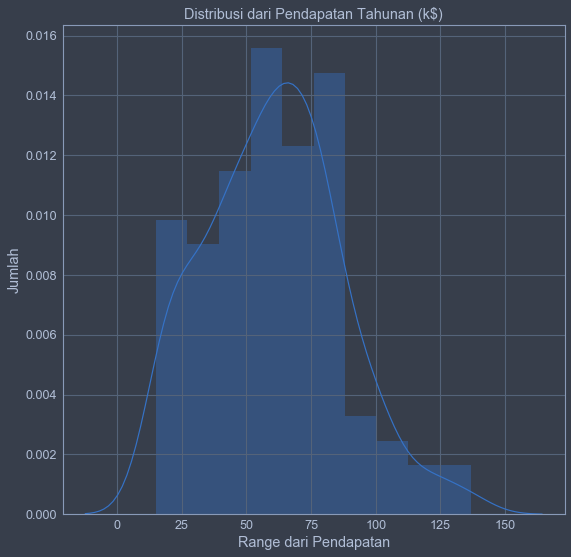

In [4]:
#Ploting Distribusi
plt.rcParams['figure.figsize'] = (9, 9)
sns.distplot(df['Age'])
plt.title('Distribusi dari Umur')
plt.xlabel('Range dari Umur')
plt.ylabel('Jumlah')
plt.show()
plt.rcParams['figure.figsize'] = (9, 9)
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribusi dari Pendapatan Tahunan (k$)')
plt.xlabel('Range dari Pendapatan')
plt.ylabel('Jumlah')
plt.show()


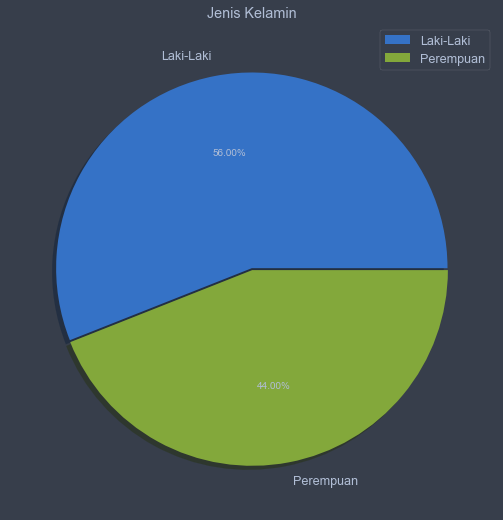

In [40]:
#Pie Chart pada Jenis Kelamin
plt.rcParams['figure.figsize'] = (9, 9)
labels = ['Laki-Laki', 'Perempuan']
data = df['Gender'].value_counts()
plt.pie(data, labels=labels, explode=[0, 0.01], shadow=True, autopct='%.2f%%')
plt.title('Jenis Kelamin')
plt.legend()

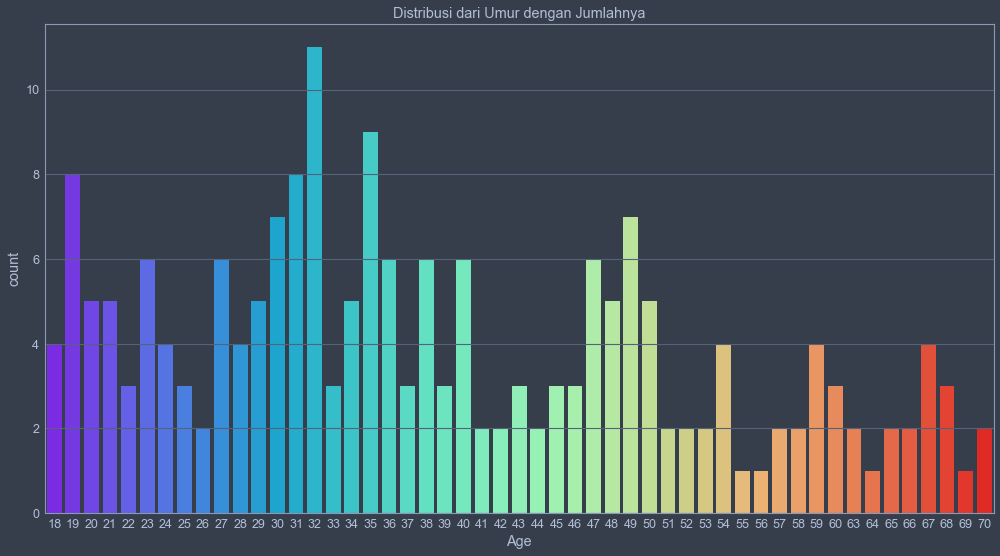

In [48]:
#Distribusi Umur dengan Jumlahnya
plt.rcParams['figure.figsize'] = (17,9)
sns.countplot(df['Age'], palette='rainbow')
plt.title('Distribusi dari Umur dengan Jumlahnya')
plt.show()

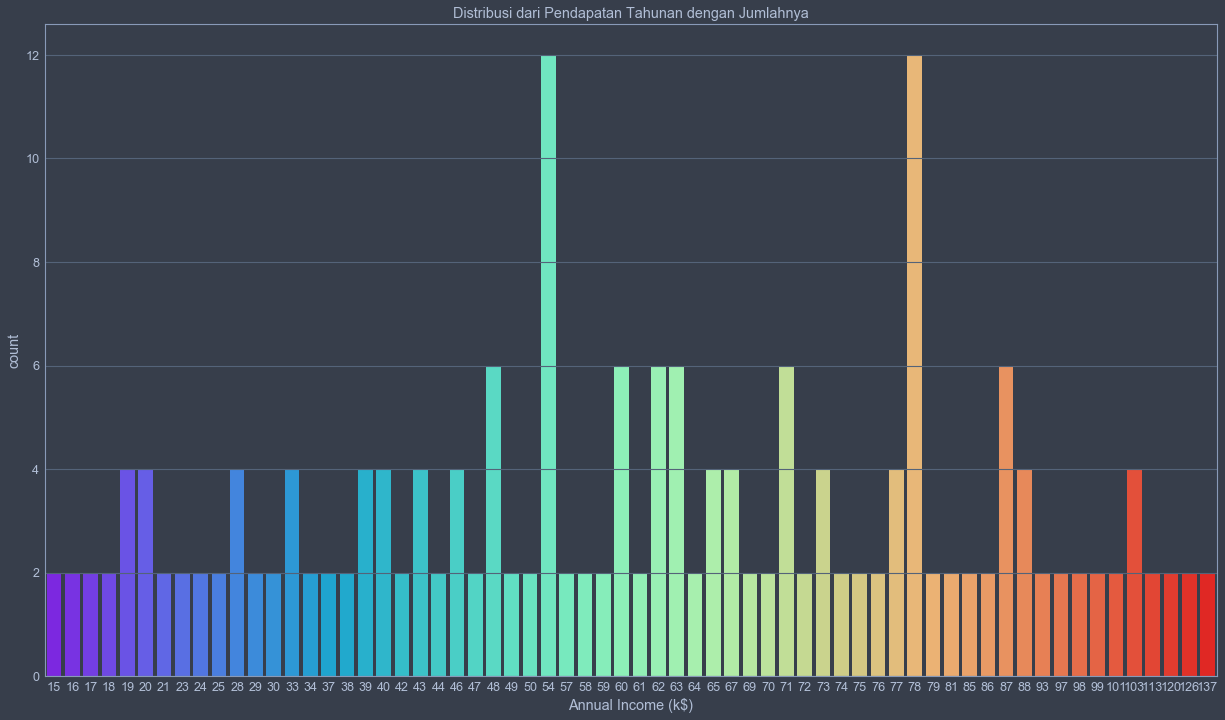

In [51]:
#Distribusi Pendapatan Tahunan dengan Jumlahnya
plt.rcParams['figure.figsize'] = (21,12)
sns.countplot(df['Annual Income (k$)'], palette='rainbow')
plt.title('Distribusi dari Pendapatan Tahunan dengan Jumlahnya')
plt.show()

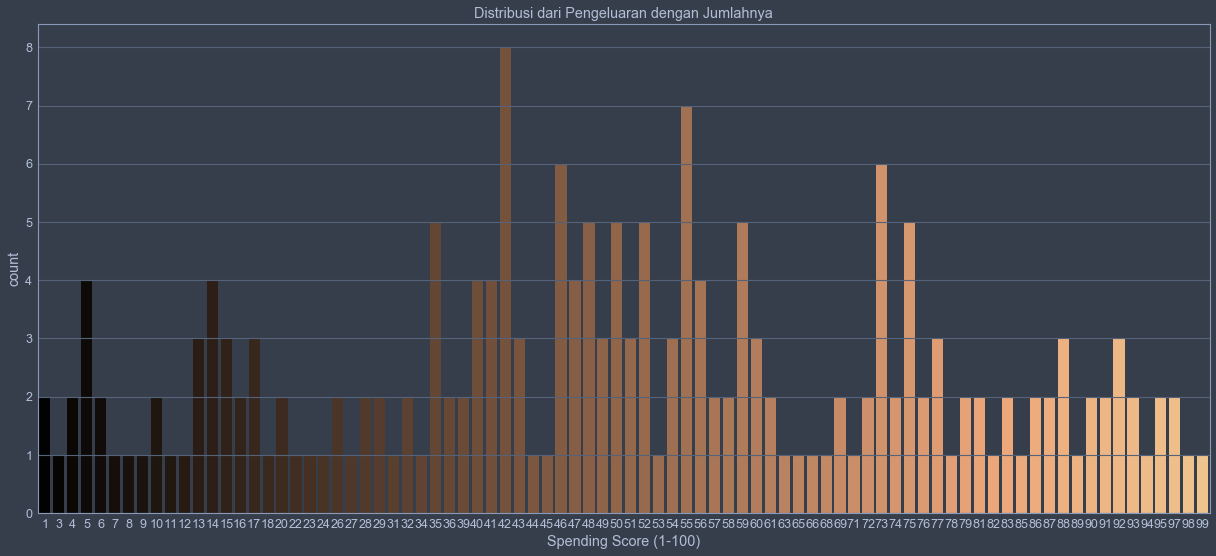

In [59]:
#Distribusi Skor Pengeluaran dengan Jumlahnya
plt.rcParams['figure.figsize'] = (21,9)
sns.countplot(df['Spending Score (1-100)'], palette='copper')
plt.title('Distribusi dari Pengeluaran dengan Jumlahnya')
plt.show()

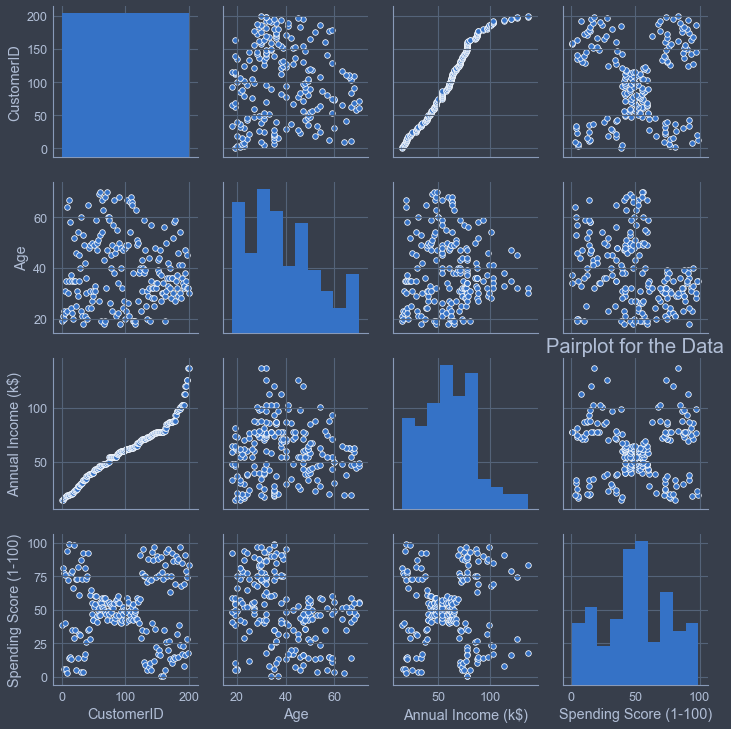

In [56]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

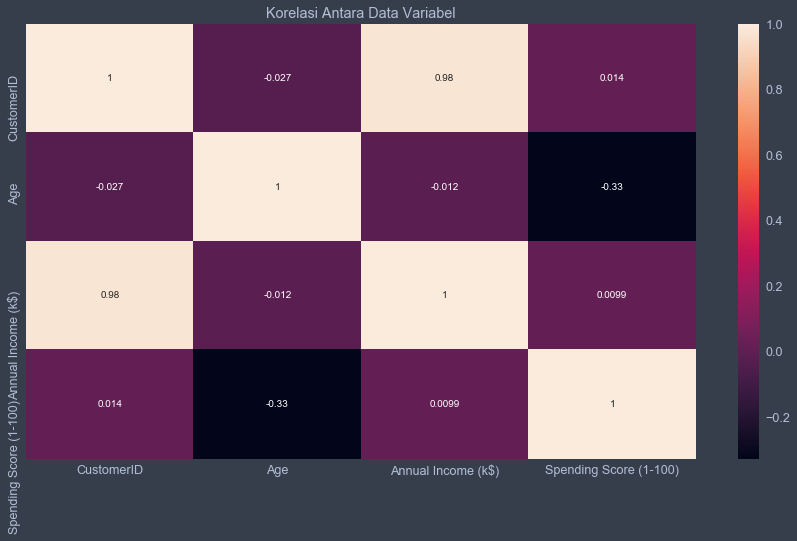

In [58]:
#Korelasi Data
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), annot=True)
plt.title('Korelasi Antara Data Variabel')
plt.show()

Text(0.5, 1.0, 'Pendapatan Tahunan vs Skor Pengeluaran dan Umur')

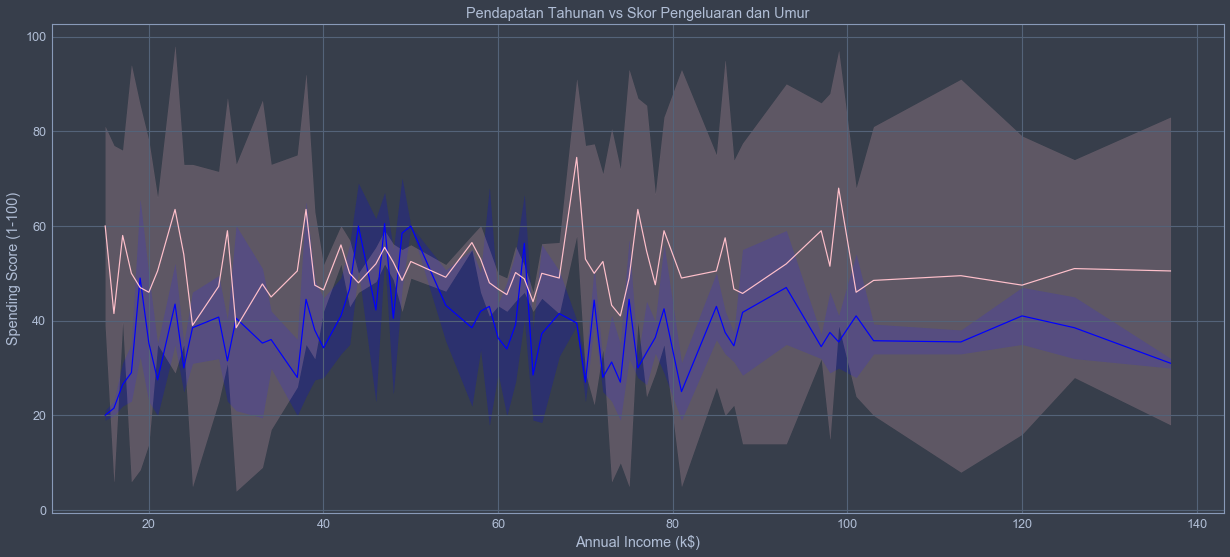

In [61]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Pendapatan Tahunan vs Skor Pengeluaran dan Umur')

In [7]:
X = df.iloc[:, [3, 4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

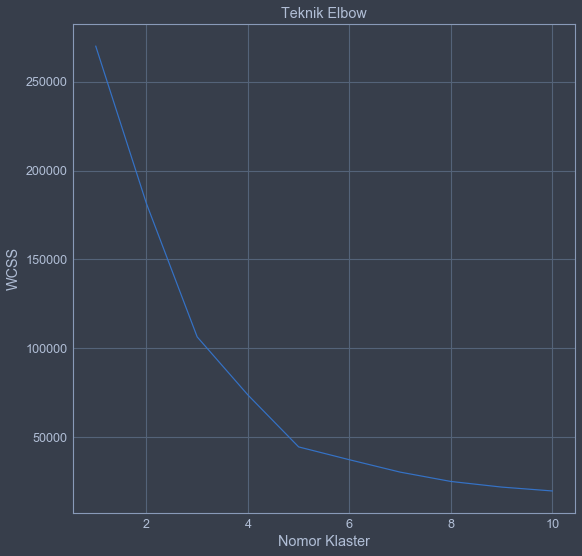

In [9]:
#Clustering anaylysis 
#Find the best K using Elbow Method

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Teknik Elbow')
plt.xlabel('Nomor Klaster')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

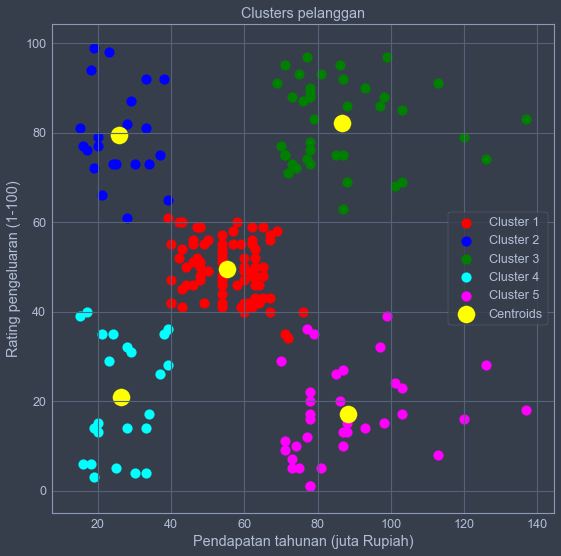

In [14]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters pelanggan')
plt.xlabel('Pendapatan tahunan (juta Rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()